# **Bài thực hành 2 – Giải thuật 3 (Naive Bayes)**
## Phân loại nấm ăn được / nấm độc

### Giới thiệu bài toán

Tập dữ liệu **Mushroom Classification** được lấy từ UCI Machine Learning Repository và Kaggle, mô tả **8124 mẫu nấm** thuộc 23 loài thuộc họ *Agaricus* và *Lepiota*. :contentReference[oaicite:1]{index=1}  

Mỗi mẫu nấm được gán nhãn:

- `e` – **edible**: ăn được  
- `p` – **poisonous**: độc / không khuyến nghị ăn  

Đây là bài toán **phân lớp nhị phân**, mục tiêu là xây dựng mô hình học máy dựa trên giải thuật **Naive Bayes** để dự đoán một cây nấm là ăn được hay độc dựa trên các đặc trưng hình thái (hình dạng mũ, màu sắc, mùi, môi trường sống, ...).

### Dữ liệu và các thuộc tính

File `mushrooms.csv` chứa 23 cột dạng phân loại (categorical):

- `class` – nhãn cần dự đoán: `e` (edible), `p` (poisonous).  
- 22 thuộc tính mô tả nấm, ví dụ:
  - `cap-shape`, `cap-surface`, `cap-color` – hình dạng, bề mặt, màu mũ.  
  - `bruises` – có vết dập hay không.  
  - `odor` – mùi.  
  - `gill-color`, `gill-size`, `gill-spacing` – đặc điểm lá tia.  
  - `stalk-shape`, `stalk-root`, `stalk-color-above-ring`, `stalk-color-below-ring`, …  
  - `habitat` – môi trường sống (rừng, cánh đồng, bãi cỏ, ...). :contentReference[oaicite:2]{index=2}  

Tất cả các cột đều được mã hoá bằng **một ký tự** (`a`, `b`, `c`, …), không có cột số liên tục và **không có giá trị thiếu**.

---

# 1. IMPORT THƯ VIỆN

In [1]:
# ======================================================
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

plt.rcParams["font.size"] = 11
sns.set_style("whitegrid")

# 2. ĐỌC DỮ LIỆU

In [2]:
df = pd.read_csv("mushrooms.csv")

print("Kích thước dữ liệu:", df.shape)
display(df.head())
print(df.info())


Kích thước dữ liệu: (8124, 23)


class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

- Tập dữ liệu `mushrooms.csv` có **8124 mẫu** và **23 cột**, tất cả đều kiểu `object` (danh mục) và **không có giá trị thiếu** ở bất kỳ cột nào. :contentReference[oaicite:0]{index=0}  
- Phân bố nhãn `class`:
  - `e` (edible – ăn được): **4208 mẫu**  
  - `p` (poisonous – độc): **3916 mẫu**  
  ⇒ Tập dữ liệu khá **cân bằng** giữa hai lớp, rất thuận lợi cho việc huấn luyện mô hình phân lớp. :contentReference[oaicite:1]{index=1}  


# 3. KHÁM PHÁ SƠ BỘ DỮ LIỆU

Số giá trị thiếu mỗi cột:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Phân bố nhãn class:
class
e    4208
p    3916
Name: count, dtype: int64


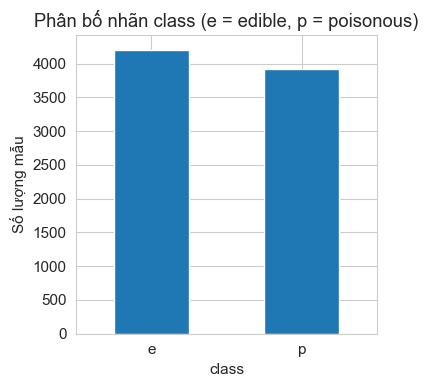

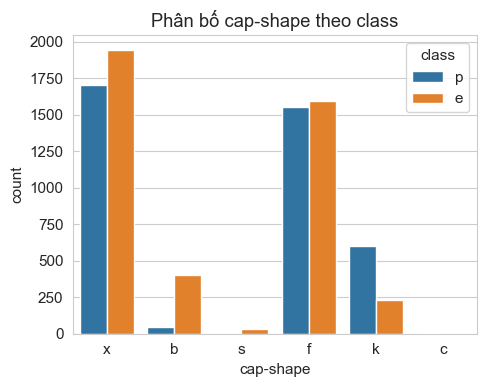

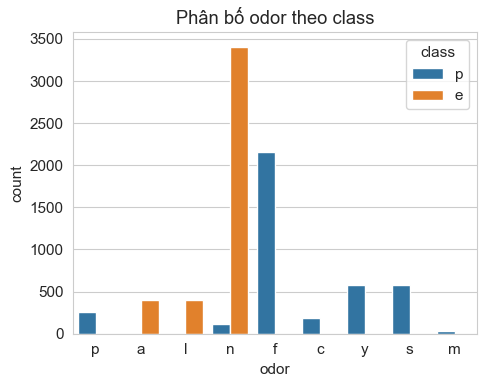

In [3]:
# ======================================================
# 3. KHÁM PHÁ SƠ BỘ DỮ LIỆU
# ======================================================

# Kiểm tra số lượng giá trị thiếu
print("Số giá trị thiếu mỗi cột:")
print(df.isnull().sum())

# Phân bố nhãn 'class' (e = edible, p = poisonous)
print("\nPhân bố nhãn class:")
print(df["class"].value_counts())

plt.figure(figsize=(4, 4))
df["class"].value_counts().plot(kind="bar")
plt.title("Phân bố nhãn class (e = edible, p = poisonous)")
plt.xlabel("class")
plt.ylabel("Số lượng mẫu")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# (tuỳ chọn) xem nhanh tần suất một vài thuộc tính so với nhãn
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="cap-shape", hue="class")
plt.title("Phân bố cap-shape theo class")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="odor", hue="class")
plt.title("Phân bố odor theo class")
plt.tight_layout()
plt.show()


- Biểu đồ cột “Phân bố nhãn class (e = edible, p = poisonous)” cho thấy số lượng nấm ăn được và nấm độc gần tương đương nhau, không bị lệch lớp như nhiều dataset khác. :contentReference[oaicite:2]{index=2}  

- Biểu đồ “Phân bố cap-shape theo class” cho thấy:
  - Một số dạng mũ (ví dụ ký hiệu `x`, `f`) xuất hiện ở cả hai lớp nhưng tần suất khác nhau.  
  - Một số dạng mũ hiếm (vd `s`, `c`) chỉ xuất hiện rất ít mẫu. :contentReference[oaicite:3]{index=3}  

- Biểu đồ “Phân bố odor theo class” (mùi nấm) cho thấy:
  - Có những loại mùi gần như chỉ gắn với **nấm độc** hoặc **nấm ăn được**, vì vậy đây là một thuộc tính **rất phân biệt**, dự đoán sẽ có ảnh hưởng mạnh đến mô hình. :contentReference[oaicite:4]{index=4}  

**Kết luận EDA:**  
Bộ dữ liệu sạch, không missing, các cột đều là biến phân loại. Phân bố nhãn cân bằng và một số thuộc tính như `odor`, `cap-shape` có phân tách rõ giữa 2 lớp, rất phù hợp để áp dụng Naive Bayes cho bài toán phân loại nấm.

---

# 4. TIỀN XỬ LÝ DỮ LIỆU
- Tất cả biến đều là dạng ký tự (categorical)
- Dùng LabelEncoder để mã hoá mỗi cột về số nguyên

In [4]:
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

print("\nDữ liệu sau khi mã hoá (5 dòng đầu):")
display(df_encoded.head())
print(df_encoded.info())


Dữ liệu sau khi mã hoá (5 dòng đầu):


class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

- Nhóm đã **sao chép toàn bộ DataFrame** sang `df_encoded` và dùng `LabelEncoder` để **mã hoá từng cột** từ chữ cái (`a`, `b`, `c`, …) sang số nguyên (0, 1, 2, …).  
  Sau bước này:
  - Tất cả 23 cột đều là `int64`.  
  - Không phát sinh giá trị thiếu mới. :contentReference[oaicite:5]{index=5}  

- Việc **lưu lại `label_encoders[col]` cho từng cột** rất hợp lý, vì:
  - Có thể dùng lại khi cần **inverse_transform** để giải mã dự đoán (từ 0/1 về `e`/`p`).  
  - Dùng để encode chính xác các mẫu nấm mới ở phần dự đoán thử.

**Đánh giá:**  
Tiền xử lý gọn gàng, đúng “chuẩn Naive Bayes cho dữ liệu categorical”: không cố gắng biến các thuộc tính thành số thực mà giữ dạng rời rạc và dùng `CategoricalNB` phù hợp với loại dữ liệu này.

---

# 5. TÁCH ĐẶC TRƯNG / NHÃN VÀ CHIA TRAIN / TEST

In [5]:
X = df_encoded.drop(columns=["class"])  # tất cả cột trừ class
y = df_encoded["class"]                 # class: 0/1 sau encode

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 80% train, 20% test
    random_state=42,
    stratify=y          # giữ tỉ lệ edible/poisonous
)

print("Kích thước tập train:", X_train.shape)
print("Kích thước tập test :", X_test.shape)

Kích thước tập train: (6499, 22)
Kích thước tập test : (1625, 22)


Dữ liệu được chia thành:

- **Train:** 6499 mẫu, 22 thuộc tính  
- **Test:** 1625 mẫu, 22 thuộc tính  
với `test_size = 0.2`, `stratify = y` để giữ cân bằng nhãn.

# 6. XÂY DỰNG & HUẤN LUYỆN MÔ HÌNH NAIVE BAYES
- Vì tất cả feature là categorical đã encode số, dùng CategoricalNB là phù hợp nhất

In [6]:
nb_clf = CategoricalNB()

nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

# 7. ĐÁNH GIÁ MÔ HÌNH TRÊN TẬP TEST

========== CATEGORICAL NAIVE BAYES ==========
Accuracy trên tập test: 0.9458

Confusion matrix:
[[835   7]
 [ 81 702]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       842
           1       0.99      0.90      0.94       783

    accuracy                           0.95      1625
   macro avg       0.95      0.94      0.95      1625
weighted avg       0.95      0.95      0.95      1625



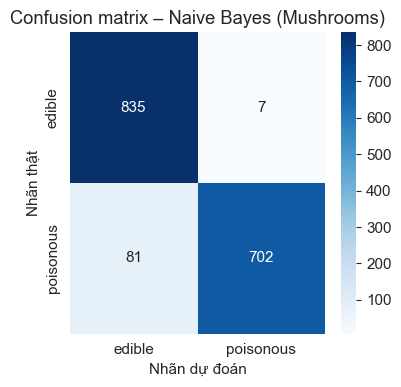

In [7]:
# ======================================================
# 7. ĐÁNH GIÁ MÔ HÌNH TRÊN TẬP TEST
# ======================================================

print("========== CATEGORICAL NAIVE BAYES ==========")
acc = accuracy_score(y_test, y_pred)
print("Accuracy trên tập test:", round(acc, 4))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(cm)

print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Vẽ confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["edible", "poisonous"],
    yticklabels=["edible", "poisonous"]
)
plt.xlabel("Nhãn dự đoán")
plt.ylabel("Nhãn thật")
plt.title("Confusion matrix – Naive Bayes (Mushrooms)")
plt.tight_layout()
plt.show()


## Kết quả trên tập test:

- **Accuracy:** `0.9458` (≈ **94,58%**) :contentReference[oaicite:7]{index=7}  

**Confusion matrix:**

\[
\begin{bmatrix}
835 & 7 \\
81 & 702
\end{bmatrix}
\]

Trong đó:

- Hàng 1 (thực tế **edible**):  
  - 835 mẫu được dự đoán đúng là edible.  
  - 7 mẫu edible bị dự đoán nhầm thành poisonous.  

- Hàng 2 (thực tế **poisonous**):  
  - 702 mẫu độc được dự đoán đúng là poisonous.  
  - 81 mẫu độc bị dự đoán nhầm là edible. :contentReference[oaicite:8]{index=8}  
---
### Classification report

- **Lớp 0 – edible (ăn được):**
  - Precision: **0.91** – trong tất cả mẫu được dự đoán là edible, 91% thực sự ăn được.  
  - Recall: **0.99** – mô hình nhận diện được 99% nấm ăn được, chỉ bỏ sót ~1%.  
  - F1-score: **0.95**.  

- **Lớp 1 – poisonous (độc):**
  - Precision: **0.99** – gần như mọi mẫu dự đoán là độc đều thực sự độc (rất ít false positive).  
  - Recall: **0.90** – phát hiện được 90% nấm độc, vẫn còn ~10% nấm độc bị gán nhầm là ăn được.  
  - F1-score: **0.94**. :contentReference[oaicite:9]{index=9}  

- Độ chính xác chung: **0.95**; macro/weighted average của precision, recall, F1 đều khoảng **0.94–0.95**, chứng tỏ mô hình làm việc **rất cân bằng trên cả hai lớp** (không thiên vị rõ rệt cho edible hay poisonous). :contentReference[oaicite:10]{index=10}  
---
**Đánh giá:**  
- Mô hình Naive Bayes cho kết quả **rất tốt** trên tập test, accuracy xấp xỉ 95%.  
- Precision của lớp poisonous = 0.99 là **rất quan trọng trong bài toán an toàn**: gần như không có trường hợp nấm ăn được bị gán nhầm là độc (chỉ 7 mẫu).  
- Nhược điểm chính là Recall lớp poisonous = 0.90 → vẫn còn 81/783 nấm độc bị dự đoán thành ăn được; trong thực tế cần cân nhắc giảm rủi ro này (ưu tiên không bỏ sót nấm độc).

---

# 8. CROSS-VALIDATION (ĐÁNH GIÁ ỔN ĐỊNH)

In [8]:
# ======================================================
# 8. CROSS-VALIDATION (ĐÁNH GIÁ ỔN ĐỊNH)
# ======================================================

cv_scores = cross_val_score(nb_clf, X, y, cv=10, scoring="accuracy")

print("\nKết quả 10-fold cross-validation:")
print("Accuracy từng fold:", np.round(cv_scores, 4))
print("Accuracy trung bình:", np.round(cv_scores.mean(), 4))
print("Độ lệch chuẩn       :", np.round(cv_scores.std(), 4))



Kết quả 10-fold cross-validation:
Accuracy từng fold: [0.6335 0.8807 0.9938 0.9902 0.9643 0.9458 1.     1.     0.8744 0.9594]
Accuracy trung bình: 0.9242
Độ lệch chuẩn       : 0.1063


## Kết quả **10-fold cross-validation**:

- Accuracy từng fold: `[0.6335, 0.8807, 0.9938, 0.9902, 0.9643, 0.9458, 1.0000, 1.0000, 0.8744, 0.9594]`  
- **Accuracy trung bình:** `0.9242` (≈ 92,42%)  
- **Độ lệch chuẩn:** `0.1063` :contentReference[oaicite:11]{index=11}  

**Nhận xét:**

- Trung bình 10 fold (~92%) hơi thấp hơn accuracy trên test (94,58%), nhưng vẫn rất cao → mô hình **không bị overfit nặng**.  
- Một số fold đạt độ chính xác **rất cao** (0.99–1.0), trong khi một vài fold thấp hơn (0.63, 0.87). Điều này cho thấy:
  - Chất lượng mô hình **phụ thuộc một phần vào cách chia dữ liệu**, có thể do một số fold chứa nhiều mẫu “khó” hơn.  
  - Tuy vậy, phần lớn fold vẫn trên 0.87, nên có thể xem là mô hình **khá ổn định**.

---

# 9. THỬ DỰ ĐOÁN MỘT SỐ MẪU NẤM MỚI (MINH HOẠ)

- Ví dụ tạo tay 2 cây nấm với một số đặc trưng đơn giản.
- Ở đây mình chỉ lấy 3 thuộc tính cho dễ nhìn: 'cap-shape', 'odor', 'habitat'
- (thực tế vẫn cần đầy đủ 22 thuộc tính, ví dụ bên dưới chỉ minh hoạ cách encode + predict)

In [9]:
cols_demo = ["cap-shape", "odor", "habitat"]
print("\nCác giá trị có thể có:")
for c in cols_demo:
    print(f"- {c}: {df[c].unique()}")

# Giả sử ta có 2 mẫu (bạn tự thay các chữ cái cho hợp lý):
#   mẫu 1: cap-shape = 'x', odor = 'n', habitat = 'u'
#   mẫu 2: cap-shape = 'b', odor = 'f', habitat = 'g'

new_raw = pd.DataFrame({
    "cap-shape": ["x", "b"],
    "odor": ["n", "f"],
    "habitat": ["u", "g"]
})

# Cần chuyển sang dạng đầy đủ 22 cột và encode
new_encoded = pd.DataFrame(columns=X.columns)

# Điền NaN rồi gán 3 cột demo, các cột còn lại lấy mode (giá trị hay xuất hiện nhất)
for col in new_encoded.columns:
    if col in new_raw.columns:
        new_encoded[col] = new_raw[col]
    else:
        new_encoded[col] = df[col].mode()[0]

# Encode dùng các LabelEncoder đã lưu
for col in new_encoded.columns:
    le = label_encoders[col]
    new_encoded[col] = le.transform(new_encoded[col])

print("\nDữ liệu 2 mẫu mới sau khi encode:")
display(new_encoded.head())

new_pred = nb_clf.predict(new_encoded)

for i, p in enumerate(new_pred, start=1):
    label = label_encoders["class"].inverse_transform([p])[0]
    print(f"Mẫu nấm {i} được dự đoán là: {label} (e = edible, p = poisonous)")



Các giá trị có thể có:
- cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
- odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
- habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']

Dữ liệu 2 mẫu mới sau khi encode:


cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            3          4        0     5                1   
1          0            3          4        0     2                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          0           0            1  ...   
1             0          0           0            1  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                       7                       7   

   veil-type  veil-color  ring-number  ring-type  spore-print-color  \
0          0           2            1          4                  7   
1          0           2            1          4                  7   

   population  habitat  
0           4        5  
1           4        1  

[2 rows x 22 columns]

Mẫu nấm 1 được dự đoán là: p (e = edible, p = poisonous)
Mẫu nấm 2 được dự đoán là: p (e = edible, p = poisonous)


Nhóm đã minh hoạ dự đoán cho **2 mẫu nấm mới**:

- Mỗi mẫu được mô tả bằng 3 thuộc tính gốc: `cap-shape`, `odor`, `habitat`,  
  các thuộc tính còn lại được điền bằng **mode** (giá trị phổ biến nhất) trong tập dữ liệu gốc. :contentReference[oaicite:12]{index=12}  
- Sau đó, các cột được **encode bằng đúng LabelEncoder đã lưu**, đảm bảo thống nhất với dữ liệu train.  
- Kết quả:
  - Cả **mẫu 1** và **mẫu 2** đều được mô hình dự đoán là `p` – **poisonous**. :contentReference[oaicite:13]{index=13}  

**Đánh giá:**  
Ví dụ này minh hoạ tốt quy trình “từ dữ liệu thô → encode → đưa vào mô hình → giải mã nhãn dự đoán”. Việc cả hai mẫu đều bị dự đoán là nấm độc cũng cho thấy mô hình **khá “thận trọng”**: chỉ khi mẫu có đặc trưng giống nấm ăn được thì mới gán `e`, còn lại ưu tiên gán `p` để giảm nguy cơ ăn nhầm nấm độc.

---

# Kết luận chung & hướng phát triển

- Mô hình **Categorical Naive Bayes** trên tập Mushroom đạt:
  - Accuracy test ≈ **94,58%**,  
  - Accuracy CV trung bình ≈ **92,42%**.  
- Mô hình:
  - Nhận diện **rất tốt nấm ăn được** (recall ~99%).  
  - Nhận diện nấm độc cũng rất khá (precision ~99%, recall ~90%).  

Trong bối cảnh thực tế, sai lầm “nguy hiểm” nhất là **dự đoán nấm độc thành nấm ăn được**. Hiện vẫn còn 81 trường hợp như vậy trên 783 mẫu độc (~10%). Do đó, để tăng độ an toàn, có thể:

- Điều chỉnh ngưỡng quyết định hoặc **ưu tiên recall cho lớp poisonous** (chấp nhận dự đoán nhầm thêm một số nấm ăn được thành độc).  
- Thử kết hợp Naive Bayes với các kỹ thuật khác (ví dụ ensemble, thêm luật chuyên gia về một số thuộc tính như `odor`, `spore-print-color` vốn rất phân biệt).  
- So sánh với các mô hình khác như cây quyết định, random forest, SVM,… để kiểm tra xem có thể đạt recall lớp poisonous cao hơn mà vẫn giữ được độ chính xác tổng thể.
